In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

# Set the paths to your training, validation, and test data folders
train_data_dir = '/content/drive/MyDrive/RAD_Data_InBalance/train'
val_data_dir = '/content/drive/MyDrive/RAD_Data_InBalance/val'
test_data_dir = '/content/drive/MyDrive/RAD_Data_InBalance/test'

# Define hyperparameters
batch_size = 32
epochs = 10

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation and test data
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create data generators with augmentation
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # InceptionResNetV2 input size
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 2459 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 605 images belonging to 4 classes.


In [4]:
imgs ,labels=next(train_generator)

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

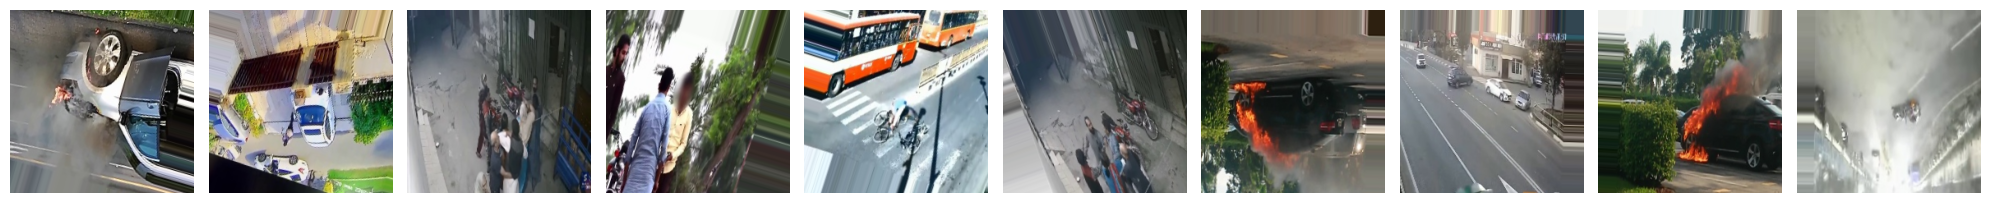

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [6]:
plotImages(imgs)
print(labels)

In [7]:
base_model = DenseNet201(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Add custom top layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [8]:
# Define the SGD optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)  # You can adjust the learning rate and momentum as needed


In [9]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Set the number of epochs
epochs = 10

history=model.fit(train_generator, validation_data=val_generator, epochs=epochs)


Epoch 1/10
77/77 [==============================] - 160s 945ms/step - loss: 0.0989 - accuracy: 0.9557 - val_loss: 3.7640e-06 - val_accuracy: 1.0000
Epoch 2/10
77/77 [==============================] - 57s 736ms/step - loss: 3.1802e-04 - accuracy: 1.0000 - val_loss: 1.3733e-06 - val_accuracy: 1.0000
Epoch 3/10
77/77 [==============================] - 56s 727ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 9.4088e-04 - val_accuracy: 1.0000
Epoch 4/10
77/77 [==============================] - 56s 725ms/step - loss: 7.6669e-04 - accuracy: 1.0000 - val_loss: 3.9630e-06 - val_accuracy: 1.0000
Epoch 5/10
77/77 [==============================] - 55s 713ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 5.1221e-06 - val_accuracy: 1.0000
Epoch 6/10
77/77 [==============================] - 55s 717ms/step - loss: 7.2676e-04 - accuracy: 0.9996 - val_loss: 5.9966e-05 - val_accuracy: 1.0000
Epoch 7/10
77/77 [==============================] - 56s 723ms/step - loss: 1.6423e-04 - accuracy: 1.0000 

<ipython-input-11-0ec457704eed>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax1.plot(epochs, acc, "b", label = "Training acc",color = 'red')
<ipython-input-11-0ec457704eed>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')


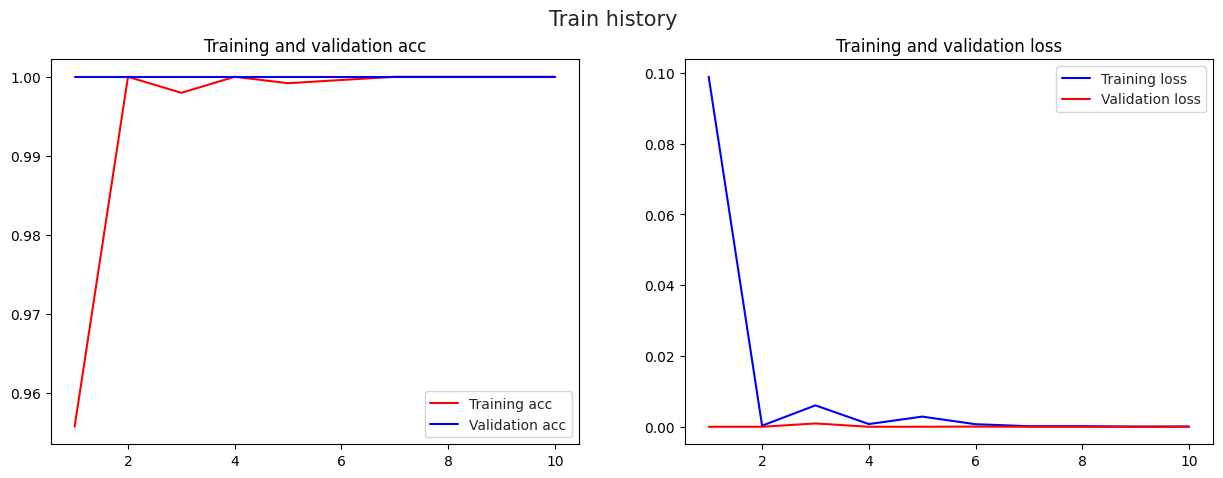

In [11]:
# Visualize the result
import matplotlib.pyplot as plt
import seaborn as sns
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Train history', size = 15)

ax1.plot(epochs, acc, "b", label = "Training acc",color = 'red')
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()

ax2.plot(epochs, loss, "b", label = "Training loss")
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()

plt.show()

In [12]:
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)

print(f'Test Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(confusion)


19/19 [==============================] - 10s 361ms/step
Test Accuracy: 100.00%
Confusion Matrix:
[[201   0   0   0]
 [  0 155   0   0]
 [  0   0 100   0]
 [  0   0   0 149]]


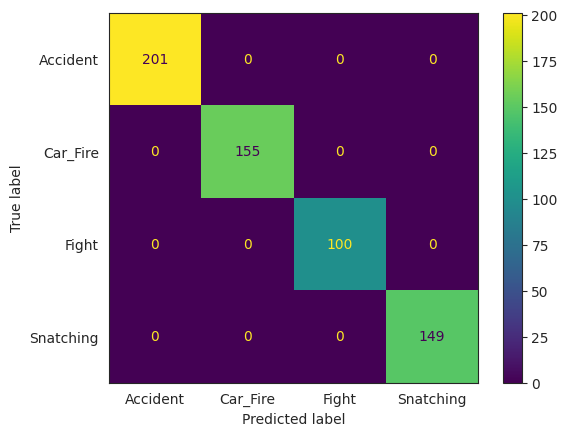

In [13]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion, display_labels = ['Accident', 'Car_Fire','Fight','Snatching'])
cm_display.plot()
plt.show()

In [14]:



model.save("Densenet201_In_Balance_with_Aughmentetion_SGD.h5")








/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
